# Import libraries

In [370]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import re
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Daily new case data by county
us_cnty_daily = pd.read_csv("cs156b-data/us/covid/nyt_us_counties_daily.csv")
# Make data column into datetime
us_cnty_daily['date'] = pd.to_datetime(us_cnty_daily['date'])
us_cnty_daily

,fips,date,county,state,cases,deaths
0,53061,2020-01-21,Snohomish,Washington,1.0,0.0
1,53061,2020-01-22,Snohomish,Washington,0.0,0.0
2,53061,2020-01-23,Snohomish,Washington,0.0,0.0
3,53061,2020-01-24,Snohomish,Washington,0.0,0.0
4,53061,2020-01-25,Snohomish,Washington,0.0,0.0
...,...,...,...,...,...,...
1141172,15005,2021-03-19,Kalawao,Hawaii,0.0,0.0
1141173,15005,2021-03-20,Kalawao,Hawaii,0.0,0.0
1141174,15005,2021-03-21,Kalawao,Hawaii,0.0,0.0
1141175,15005,2021-03-22,Kalawao,Hawaii,0.0,0.0


In [4]:
# Grouping the case data by state 
us_state_daily = us_cnty_daily.groupby(['state','date']).sum()
us_state_daily = us_state_daily.reset_index()[['state', 'date', 'cases', 'deaths']]
us_state_daily

,state,date,cases,deaths
0,Alabama,2020-03-13,6.0,0.0
1,Alabama,2020-03-14,6.0,0.0
2,Alabama,2020-03-15,11.0,0.0
3,Alabama,2020-03-16,6.0,0.0
4,Alabama,2020-03-17,10.0,0.0
...,...,...,...,...
21031,Wyoming,2021-03-19,102.0,0.0
21032,Wyoming,2021-03-20,0.0,0.0
21033,Wyoming,2021-03-21,0.0,0.0
21034,Wyoming,2021-03-22,150.0,0.0


In [5]:
# See this link: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md
# for details on column descriptions
policy_data = pd.read_csv("our_data/policy_data/international/OxCGRT_latest.csv")
# Make Date column in datetime 
policy_data['Date'] = pd.to_datetime(policy_data['Date'], format='%Y%m%d')
policy_data

C:\Users\gleb_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131222,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-07,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
131223,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-08,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
131224,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-09,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
131225,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-10,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0


In [6]:
# Rename columns and make lowercase

def change_case(str):
    '''
    Takes string and converts from camel case to snake case,
    returns new string in snake case
    '''
    underscore_seen = str[0] == '_'
    
    res = [str[0].lower()]
    for c in str[1:]:
        if c in ('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
            if not underscore_seen:
                res.append('_')
            res.append(c.lower())
        else:
            res.append(c)
            underscore_seen = 0
        underscore_seen = c == '_'
     
    return ''.join(res)

# Strip outer whitespace and replace inner whitespace with underscore
policy_data.columns = policy_data.columns.str.strip().str.replace(" ", "_")

# Convert camelcase columns to snake case
new_cols = []
for index, c in policy_data.iteritems():
    new_cols.append(change_case(index))
policy_data.columns = pd.Index(new_cols)
policy_data.columns

Index(['country_name', 'country_code', 'region_name', 'region_code',
       'jurisdiction', 'date', 'c1_school_closing', 'c1_flag',
       'c2_workplace_closing', 'c2_flag', 'c3_cancel_public_events', 'c3_flag',
       'c4_restrictions_on_gatherings', 'c4_flag', 'c5_close_public_transport',
       'c5_flag', 'c6_stay_at_home_requirements', 'c6_flag',
       'c7_restrictions_on_internal_movement', 'c7_flag',
       'c8_international_travel_controls', 'e1_income_support', 'e1_flag',
       'e2_debt/contract_relief', 'e3_fiscal_measures',
       'e4_international_support', 'h1_public_information_campaigns',
       'h1_flag', 'h2_testing_policy', 'h3_contact_tracing',
       'h4_emergency_investment_in_healthcare', 'h5_investment_in_vaccines',
       'h6_facial_coverings', 'h6_flag', 'h7_vaccination_policy', 'h7_flag',
       'h8_protection_of_elderly_people', 'h8_flag', 'm1_wildcard',
       'confirmed_cases', 'confirmed_deaths', 'stringency_index',
       'stringency_index_for_display', 

In [7]:
# Replace NaNs in policy columns such as c1_school_closing.
# At earliest NaN, fill based on previous policy value
r1 = re.compile("c[123456789]_flag")
r2 = re.compile("c[123456789]_\S")

policy_col_names = []
for c_index, c in policy_data.iteritems():
        if not bool(r1.search(c_index)) and bool(r2.search(c_index)):
            policy_col_names.append(c_index)

running_df = None
for name_df, df in policy_data.groupby(['country_code', 'region_code']):      
    df.loc[:, policy_col_names] = df[policy_col_names].ffill()
    if running_df is None:
        running_df = df.copy()
    else:
        running_df = pd.concat([running_df, df], axis = 0)
        
filled_policy_data_df = running_df.copy()

In [8]:
us_filled_policy_data_df = filled_policy_data_df.loc[filled_policy_data_df['country_code'] == 'USA'].copy()
us_filled_policy_data_df.columns

Index(['country_name', 'country_code', 'region_name', 'region_code',
       'jurisdiction', 'date', 'c1_school_closing', 'c1_flag',
       'c2_workplace_closing', 'c2_flag', 'c3_cancel_public_events', 'c3_flag',
       'c4_restrictions_on_gatherings', 'c4_flag', 'c5_close_public_transport',
       'c5_flag', 'c6_stay_at_home_requirements', 'c6_flag',
       'c7_restrictions_on_internal_movement', 'c7_flag',
       'c8_international_travel_controls', 'e1_income_support', 'e1_flag',
       'e2_debt/contract_relief', 'e3_fiscal_measures',
       'e4_international_support', 'h1_public_information_campaigns',
       'h1_flag', 'h2_testing_policy', 'h3_contact_tracing',
       'h4_emergency_investment_in_healthcare', 'h5_investment_in_vaccines',
       'h6_facial_coverings', 'h6_flag', 'h7_vaccination_policy', 'h7_flag',
       'h8_protection_of_elderly_people', 'h8_flag', 'm1_wildcard',
       'confirmed_cases', 'confirmed_deaths', 'stringency_index',
       'stringency_index_for_display', 

<AxesSubplot:>

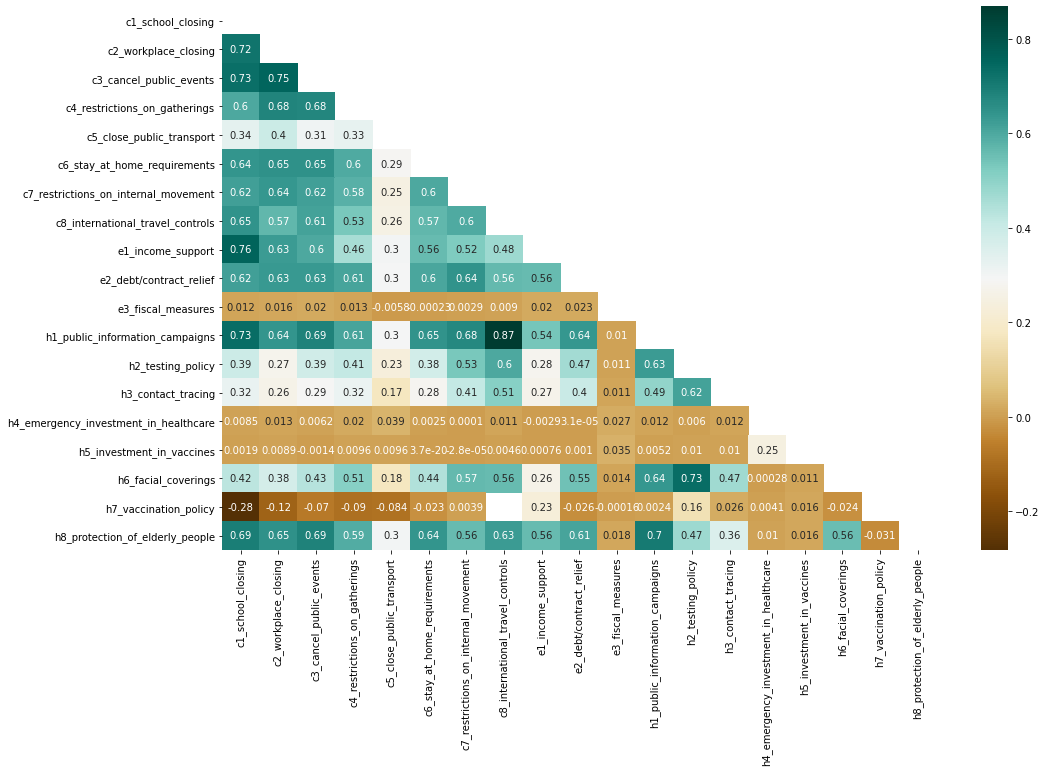

In [9]:
policies = ['c1_school_closing', 'c2_workplace_closing', 'c3_cancel_public_events',
           'c4_restrictions_on_gatherings', 'c5_close_public_transport', 'c6_stay_at_home_requirements',
           'c7_restrictions_on_internal_movement', 'c8_international_travel_controls', 'e1_income_support', 
           'e2_debt/contract_relief', 'e3_fiscal_measures', 'h1_public_information_campaigns',
           'h2_testing_policy', 'h3_contact_tracing', 'h4_emergency_investment_in_healthcare', 'h5_investment_in_vaccines',
           'h6_facial_coverings', 'h7_vaccination_policy','h8_protection_of_elderly_people']


# Looking at correlation heatmap between different policies
plt.figure(figsize=(16, 10))
policies_corr_mat = us_filled_policy_data_df[policies].corr()
sns.heatmap(policies_corr_mat, annot=True, cmap='BrBG', 
           mask=np.triu(np.ones_like(policies_corr_mat)))

In [10]:
# don't need country name (only looking at U.S.) or any flags
temp_policy_part = us_filled_policy_data_df.copy()
temp_policy_part = temp_policy_part[['region_name', 'date']+policies]
temp_policy_part

,region_name,date,c1_school_closing,c2_workplace_closing,c3_cancel_public_events,c4_restrictions_on_gatherings,c5_close_public_transport,c6_stay_at_home_requirements,c7_restrictions_on_internal_movement,c8_international_travel_controls,...,e2_debt/contract_relief,e3_fiscal_measures,h1_public_information_campaigns,h2_testing_policy,h3_contact_tracing,h4_emergency_investment_in_healthcare,h5_investment_in_vaccines,h6_facial_coverings,h7_vaccination_policy,h8_protection_of_elderly_people
103207,Alaska,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103208,Alaska,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103209,Alaska,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103210,Alaska,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103211,Alaska,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127019,Wyoming,2021-04-07,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127020,Wyoming,2021-04-08,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127021,Wyoming,2021-04-09,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127022,Wyoming,2021-04-10,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
stay_at_home_df = temp_policy_part[['region_name', 'date', 'c6_stay_at_home_requirements']].copy()
stay_at_home_df

,region_name,date,c6_stay_at_home_requirements
103207,Alaska,2020-01-01,0.0
103208,Alaska,2020-01-02,0.0
103209,Alaska,2020-01-03,0.0
103210,Alaska,2020-01-04,0.0
103211,Alaska,2020-01-05,0.0
...,...,...,...
127019,Wyoming,2021-04-07,0.0
127020,Wyoming,2021-04-08,0.0
127021,Wyoming,2021-04-09,0.0
127022,Wyoming,2021-04-10,0.0


In [338]:
stay_at_home_df[stay_at_home_df.isnull().any(axis=1)]

,region_name,date,c6_stay_at_home_requirements


In [339]:
def time_elapsed_since_policy_change(policy_df, policy_name,
                                     type_change='more_strict'):
    '''
    Takes policy_df with columns <policy_name>, 'region_name'
    where the <policy_name> column contains a series of numbers on an ordinal scale of strictness
   (highest number = most strict) from everyday in a contiguous range of days
    Returns a list of number
    of days since change in policy in a given region on a given date
    
    Assuming the date column has all dates in a contiguous period.
    '''
    time_elapsed_all_regions = np.zeros(policy_df.shape[0])
    
    for region in policy_df.region_name.unique(): 
        
        region_policies = policy_df.loc[policy_df.region_name == region, policy_name]
        
        time_elapsed= np.arange(0, region_policies.size)
        
        prev_region_policies = region_policies.shift()
        prev_region_policies.iloc[0] = 0 #assuming there was no policy in place before the first date
        
        if type_change == 'more_strict':
            points_of_change_mask = ((region_policies - prev_region_policies) > 0).to_numpy()
        else:
             points_of_change_mask = ((region_policies - prev_region_policies) < 0).to_numpy()

        
        for i in range(time_elapsed[points_of_change_mask].size):
            # point is the index at which a change has occured
            point = time_elapsed[points_of_change_mask][i]
            
            if i == 0 and point > 0 :
                time_elapsed[:point] = 0
                
            if i < time_elapsed[points_of_change_mask].size-1:
                next_point = time_elapsed[points_of_change_mask][i+1]
                time_elapsed[point:next_point] -= point
            else:
                time_elapsed[point:] -= point
        
        time_elapsed_all_regions[policy_df.region_name == region] = time_elapsed
        # END for; next region
    
    return time_elapsed_all_regions
    
    

In [340]:
stay_at_home_df.loc[:, 'days_since_more_strict'] = time_elapsed_since_policy_change(stay_at_home_df, 
                                                                                     'c6_stay_at_home_requirements',
                                                                                      type_change='more_strict')
stay_at_home_df.loc[:, 'days_since_less_strict'] = time_elapsed_since_policy_change(stay_at_home_df, 
                                                                                     'c6_stay_at_home_requirements',
                                                                                      type_change='less_strict')

In [341]:
stay_at_home_df[stay_at_home_df.isnull().any(axis=1)]

,region_name,date,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict


In [342]:
# Merging policy data with case and death data
stay_at_home_df.rename(columns={'region_name': 'state'}, inplace=True)
not_states = ['District of Columbia', 'Guam', 'Northern Mariana Islands','Puerto Rico', 'Virgin Islands']
us_state_daily_50 =  us_state_daily[~(us_state_daily.state.isin(not_states))]
stay_at_home_df = us_state_daily_50.merge(stay_at_home_df, how='left', on=['state', 'date'] )

In [343]:
stay_at_home_df[stay_at_home_df.isnull().any(axis=1)]

,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict


In [344]:
def get_yesterdays_active_cases(case_df, window=15):
    '''
    Takes df with 'state', and (new) 'cases' column and returns a rolling window-length
    sum of new cases until today (excluding today) to get the number of active cases yesterday.
    Returns the series of yesterdays_active_cases.
    '''

    running_series = None
    for name_df, df in case_df.groupby(['state']):      
        series =  df['cases'].shift().rolling(window, min_periods=1).sum()
        series.iloc[0] = 0
        if running_series is None:
            running_series = series.copy()
        else:
            running_series = pd.concat([running_series, series], axis = 0)
    
    return running_series.reset_index(drop=True)

stay_at_home_df['yesterdays_active_cases'] = get_yesterdays_active_cases(stay_at_home_df)

In [345]:
display(stay_at_home_df[stay_at_home_df.isnull().any(axis=1)])
stay_at_home_df

,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases


,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases
0,Alabama,2020-03-13,6.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,2020-03-14,6.0,0.0,0.0,0.0,0.0,6.0
2,Alabama,2020-03-15,11.0,0.0,0.0,0.0,0.0,12.0
3,Alabama,2020-03-16,6.0,0.0,0.0,0.0,0.0,23.0
4,Alabama,2020-03-17,10.0,0.0,0.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...
19347,Wyoming,2021-03-19,102.0,0.0,1.0,359.0,0.0,877.0
19348,Wyoming,2021-03-20,0.0,0.0,1.0,360.0,0.0,910.0
19349,Wyoming,2021-03-21,0.0,0.0,1.0,361.0,0.0,830.0
19350,Wyoming,2021-03-22,150.0,0.0,1.0,362.0,0.0,830.0


In [346]:
def get_pop_data():
    state_pop_df = pd.read_csv('cs156b-data/us/demographics/state_populations.csv')
    # convert from state abreviations to state name 
    state_to_abbrev = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'American Samoa': 'AS',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Guam': 'GU',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Northern Mariana Islands':'MP',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virgin Islands': 'VI',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
    }

    abbrev_to_state = {v: k for k, v in state_to_abbrev.items()}
    state_pop_df.state = state_pop_df.state.replace(abbrev_to_state)
    return state_pop_df
    
# getting population density info 
def get_pop_density_by_state_data():
    state_area_df = pd.read_csv('our_data/physical_data/us/state_area_measurements.csv')
    state_pop_df = get_pop_data()
    state_geopop_df = state_pop_df.merge(state_area_df, on='state')
    state_geopop_df['pop_density'] = state_geopop_df.population/state_geopop_df.total_area_mi
    return state_geopop_df[['state', 'pop_density']]

In [347]:
# adding the population density
pop_den_df = get_pop_density_by_state_data()
stay_at_home_df = stay_at_home_df.merge(pop_den_df, on='state', how='left')

In [348]:
display(stay_at_home_df[stay_at_home_df.isnull().any(axis=1)])

,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density


In [349]:
def get_at_away_6_data():
    at_away_df = pd.read_csv('our_data/misc_metric_data/us/at_away_6_data.csv')
    at_away_df = at_away_df.replace(abbrev_to_state)
    at_away_df.date = pd.to_datetime(at_away_df['date'])
    at_away_df['mobile_ppl_per100'] = at_away_df.value * 100
    return at_away_df[['date', 'state', 'mobile_ppl_per100']]

In [350]:
# Adding mobility 
mobility_df = get_at_away_6_data()
stay_at_home_df = stay_at_home_df.merge(mobility_df, on=['date', 'state'], how='left')

In [351]:
display(stay_at_home_df[stay_at_home_df.isnull().any(axis=1)])

,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density,mobile_ppl_per100


In [352]:
def get_scaled_wages_data():
    state_median_wages_df = pd.read_csv('our_data/demographic_data/us/household_median_wages_thin.csv')
    state_median_wages_df.median_income = pd.to_numeric(state_median_wages_df['median_income'])
    state_median_wages_df['scaled_median_income'] = ((state_median_wages_df['median_income'] - 
                                                      state_median_wages_df['median_income'].mean()) / 
                                                      state_median_wages_df['median_income'].std()) 
    return state_median_wages_df[['state', 'median_income', 'scaled_median_income']]

In [353]:
state_scaled_wages_df = get_scaled_wages_data()
stay_at_home_df = stay_at_home_df.merge(state_scaled_wages_df[['state', 'scaled_median_income']], on=['state'], how='left')

In [354]:
display(stay_at_home_df[stay_at_home_df.isnull().any(axis=1)])
stay_at_home_df

,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density,mobile_ppl_per100,scaled_median_income


,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density,mobile_ppl_per100,scaled_median_income
0,Alabama,2020-03-13,6.0,0.0,0.0,0.0,0.0,0.0,93.536532,7.140855,-1.154048
1,Alabama,2020-03-14,6.0,0.0,0.0,0.0,0.0,6.0,93.536532,6.980729,-1.154048
2,Alabama,2020-03-15,11.0,0.0,0.0,0.0,0.0,12.0,93.536532,6.888877,-1.154048
3,Alabama,2020-03-16,6.0,0.0,0.0,0.0,0.0,23.0,93.536532,6.480950,-1.154048
4,Alabama,2020-03-17,10.0,0.0,0.0,0.0,0.0,29.0,93.536532,6.065786,-1.154048
...,...,...,...,...,...,...,...,...,...,...,...
19347,Wyoming,2021-03-19,102.0,0.0,1.0,359.0,0.0,877.0,5.916995,5.174210,-0.391458
19348,Wyoming,2021-03-20,0.0,0.0,1.0,360.0,0.0,910.0,5.916995,5.258700,-0.391458
19349,Wyoming,2021-03-21,0.0,0.0,1.0,361.0,0.0,830.0,5.916995,5.351230,-0.391458
19350,Wyoming,2021-03-22,150.0,0.0,1.0,362.0,0.0,830.0,5.916995,5.727350,-0.391458


In [355]:
def get_political_data():
    politic_df = pd.read_csv('cs156b-data/us/demographics/countypres_2000-2016.csv')
    total_votes = politic_df[politic_df.year == 2016].groupby('state').sum().candidatevotes

    politic_df = politic_df[politic_df.year == 2016].groupby(['state', 'party']).sum().reset_index()
    politic_df = politic_df[['state', 'party', 'candidatevotes']]
    politic_df.loc[politic_df.party == 'republican', 'candidatevotes'] *= -1
    politic_df = politic_df.groupby('state').sum()
    politic_df.rename(columns={'candidatevotes': 'political_index'}, inplace=True)
    politic_df.political_index =  politic_df.political_index/ total_votes.loc[politic_df.political_index.index]
    
    return politic_df

In [356]:
politic_df = get_political_data()
stay_at_home_df = stay_at_home_df.merge(politic_df, how='left', on=['state'])

In [357]:
stay_at_home_df
display(stay_at_home_df[stay_at_home_df.isnull().any(axis=1)])

,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density,mobile_ppl_per100,scaled_median_income,political_index


In [358]:
def binary_encode_category(categories, category_name):
    '''
    Takes np array of unique categories. Returns dataframe of the categories with
    columns of their new encodings
    '''
    num_bin_digits = math.ceil(np.log2(len(categories)))
    vbinary_repr = np.vectorize(np.binary_repr)
    bin_categories = vbinary_repr(np.arange(0, len(categories)), width=num_bin_digits)
    
    df = pd.DataFrame({category_name: categories, 'binary': bin_categories})
    for i in range(num_bin_digits):
        df[f'{category_name}_{i}'] = [int(s) for s in df.binary.str[i]]
    
    df = df.drop(columns='binary')
    return df
    

In [359]:
alpha_ordered_states = stay_at_home_df.state.unique()
alpha_ordered_states.sort()
alpha_ordered_states
binary_state_encoded_df = binary_encode_category(alpha_ordered_states, 'state')
stay_at_home_df = stay_at_home_df.merge(binary_state_encoded_df, on='state', how='left')

In [360]:
display(stay_at_home_df[stay_at_home_df.isnull().any(axis=1)])
stay_at_home_df

,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density,mobile_ppl_per100,scaled_median_income,political_index,state_0,state_1,state_2,state_3,state_4,state_5


,state,date,cases,deaths,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density,mobile_ppl_per100,scaled_median_income,political_index,state_0,state_1,state_2,state_3,state_4,state_5
0,Alabama,2020-03-13,6.0,0.0,0.0,0.0,0.0,0.0,93.536532,7.140855,-1.154048,-0.277250,0,0,0,0,0,0
1,Alabama,2020-03-14,6.0,0.0,0.0,0.0,0.0,6.0,93.536532,6.980729,-1.154048,-0.277250,0,0,0,0,0,0
2,Alabama,2020-03-15,11.0,0.0,0.0,0.0,0.0,12.0,93.536532,6.888877,-1.154048,-0.277250,0,0,0,0,0,0
3,Alabama,2020-03-16,6.0,0.0,0.0,0.0,0.0,23.0,93.536532,6.480950,-1.154048,-0.277250,0,0,0,0,0,0
4,Alabama,2020-03-17,10.0,0.0,0.0,0.0,0.0,29.0,93.536532,6.065786,-1.154048,-0.277250,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19347,Wyoming,2021-03-19,102.0,0.0,1.0,359.0,0.0,877.0,5.916995,5.174210,-0.391458,-0.462953,1,1,0,0,0,1
19348,Wyoming,2021-03-20,0.0,0.0,1.0,360.0,0.0,910.0,5.916995,5.258700,-0.391458,-0.462953,1,1,0,0,0,1
19349,Wyoming,2021-03-21,0.0,0.0,1.0,361.0,0.0,830.0,5.916995,5.351230,-0.391458,-0.462953,1,1,0,0,0,1
19350,Wyoming,2021-03-22,150.0,0.0,1.0,362.0,0.0,830.0,5.916995,5.727350,-0.391458,-0.462953,1,1,0,0,0,1


In [361]:
# Adding day, year, month and dropping date
stay_at_home_df['day'] = stay_at_home_df.date.dt.day
stay_at_home_df['month'] = stay_at_home_df.date.dt.month
stay_at_home_df['year'] = stay_at_home_df.date.dt.year-2020

In [362]:
train_df = stay_at_home_df.drop(columns=['state', 'deaths', 'date'])

In [396]:
train_df

,cases,c6_stay_at_home_requirements,days_since_more_strict,days_since_less_strict,yesterdays_active_cases,pop_density,mobile_ppl_per100,scaled_median_income,political_index,state_0,state_1,state_2,state_3,state_4,state_5,day,month,year
0,6.0,0.0,0.0,0.0,0.0,93.536532,7.140855,-1.154048,-0.277250,0,0,0,0,0,0,13,3,0
1,6.0,0.0,0.0,0.0,6.0,93.536532,6.980729,-1.154048,-0.277250,0,0,0,0,0,0,14,3,0
2,11.0,0.0,0.0,0.0,12.0,93.536532,6.888877,-1.154048,-0.277250,0,0,0,0,0,0,15,3,0
3,6.0,0.0,0.0,0.0,23.0,93.536532,6.480950,-1.154048,-0.277250,0,0,0,0,0,0,16,3,0
4,10.0,0.0,0.0,0.0,29.0,93.536532,6.065786,-1.154048,-0.277250,0,0,0,0,0,0,17,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19347,102.0,1.0,359.0,0.0,877.0,5.916995,5.174210,-0.391458,-0.462953,1,1,0,0,0,1,19,3,1
19348,0.0,1.0,360.0,0.0,910.0,5.916995,5.258700,-0.391458,-0.462953,1,1,0,0,0,1,20,3,1
19349,0.0,1.0,361.0,0.0,830.0,5.916995,5.351230,-0.391458,-0.462953,1,1,0,0,0,1,21,3,1
19350,150.0,1.0,362.0,0.0,830.0,5.916995,5.727350,-0.391458,-0.462953,1,1,0,0,0,1,22,3,1


<AxesSubplot:>

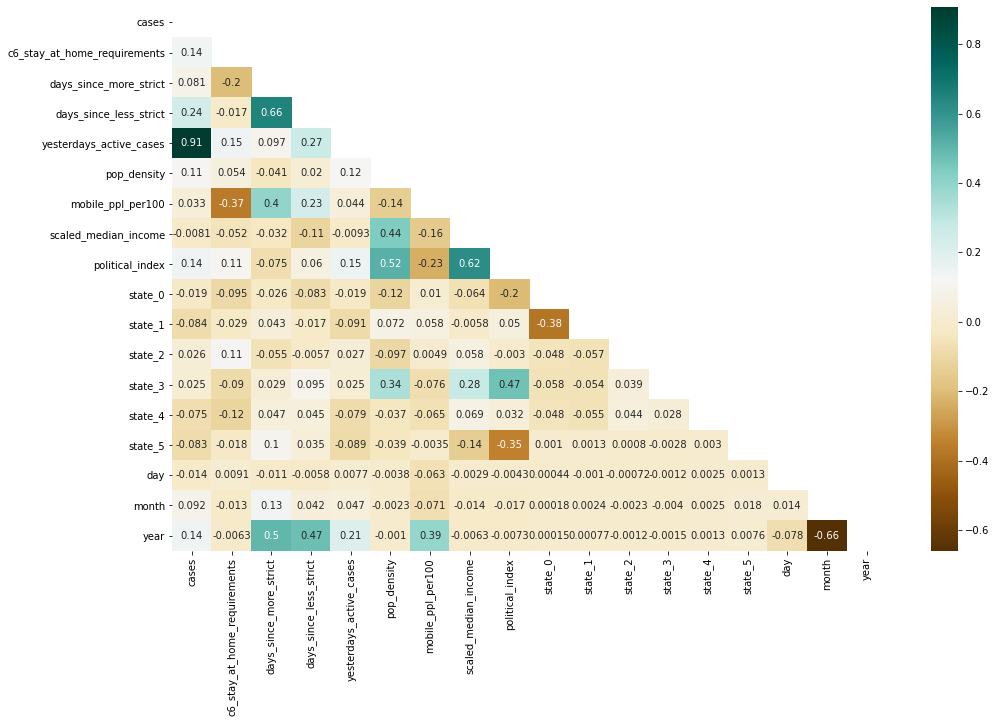

In [375]:
# Looking at correlation heatmap between different policies
plt.figure(figsize=(16, 10))
inputs_corr_mat = (train_df).corr()
sns.heatmap(inputs_corr_mat, annot=True, cmap='BrBG', 
           mask=np.triu(np.ones_like(inputs_corr_mat)))

In [397]:
X = train_df.drop(columns='cases').to_numpy()
y = train_df.cases.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [392]:
X_wo_yesterdays = train_df.drop(columns=['cases', 'yesterdays_active_cases']).to_numpy()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_wo_yesterdays, y, test_size=0.33, random_state=42)

In [393]:
regr = LinearRegression()
regr.fit(X_train2, y_train2)
train_err = mean_squared_error(y_train2,regr.predict(X_train2))
print(train_err)
regr.score(X_train2, y_train2)

8489943.062631156


0.20414123004029283

In [385]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [386]:
train_err = mean_squared_error(y_train,regr.predict(X_train))

In [387]:
train_err

1939996.4295513958

In [389]:
regr.score(X_train, y_train)

0.8181421052227291

In [382]:
regr = LinearRegression()
x_check_flat = train_df.yesterdays_active_cases.to_numpy()
x_check = x_check.reshape(len(x_check), 1)
y_check = train_df.cases.to_numpy()
regr.fit(x_check,y_check )
mean_squared_error(y_check,regr.predict(x_check))


1779597.952094453

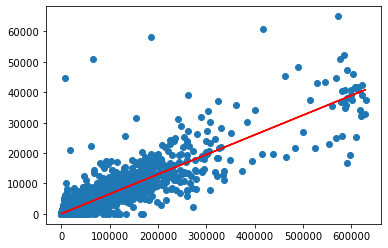

In [384]:
plt.scatter(x_check,y_check)
m, b = np.polyfit(x_check_flat, y_check, 1)
plt.plot(x_check, m*x_check + b,  color='red')

In [394]:
import statsmodels.api as sm

In [399]:
X_train = sm.add_constant(X_train)

In [401]:
stat_mod = sm.OLS(y_train, X_train)
stat_regr = stat_mod.fit()
print(stat_regr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3426.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:02:04   Log-Likelihood:            -1.1225e+05
No. Observations:               12965   AIC:                         2.245e+05
Df Residuals:                   12947   BIC:                         2.247e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -139.6248     94.715     -1.474      0.1